# Data ANZ Virtual Internship 

This notebook contians codes of the Virutal Internship offered by Data ANZ. There are two definite goals of this project.They are performing an EDA analysis on the data and Build a model which can predict Annual Salary of the customers.
https://in.insidesherpa.com/virtual-internships/ZLJCsrpkHo9pZBJNY

## Goals : 
* Segment the dataset and draw unique insights, including visualisation of the transaction volume 
* Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

### The Approach :
1. Problem Definition.
2. Data Gathering.
3. Evaluation - What success means for us in this model.
4. Features.
5. Modelling 
6. Experimentation.


## 1. Problem Definition 
> For the given data of **100 hypothetical customers** of their transaction history of **3 months**, draw some unique and interesting **insights** with the features. Build a *predictive model* to find the **annual salary** of the customers who got credit with salary in their transaction.

## 2. Data 
> The data is provided by the Data ANZ itself when we enroll ourselves in their program. The data is also on my Github Repo.

## 3. Evaluation : 
> Our *regression model* would consider an efficient one if the *mean squared error metrics* is **low** as possible for an *Linear Regression model*. For an *Decision Tree* build an **tree**out of the model trained. *Accuracy* should be above **85 % or more for an model to say optimal**.

## 4. Features : 

* status : denotes the status of the transaction posted or authorized for transaction.

* card_present_flag : does the customer had card during the transaction (1.1 = Yes or 0.0 = No).

* bpay_biller_code : unique code of the BPay Transaction done by the customer.

* account : account number of the customers who made transaction

* currency : currency type where transaction is made (AUD dollars)

* long_lat : Longitude and Latitude location of the customer.

* txn_description : the mode of transaction the customer has done 

* merchant_id : the merchant id where the customers done their transaction

* merhant_code : unique merchant code for each customers

* first_name : first name of the customers

* balance : balance the customer's had during the transaction of period 3 months 

* date : data of the transaction took place

* gender : gender of the transaction (Male or Female)

* age : age of the customer 

* merchant_suburb : the district or city where the merchant is located 

* merchant_state : the state where the merchant is located 

* extraction : extraction of the transaction data 

* amount : the amount transacted by the customer's 

* transaction_id : unique transaction id given by the merchant when the customer makes an transaction 

* country : country where the customer's are located (Australia) 

* customer_id = id for the customer's to differentiate them as unique

* merchant_long_lat : the latitude and longitude location of the customer 

* movement : how the transaction is made (credit or debit)

### Preparing the libraries for the project 
Using pandas , matplotlib , seaborn , numpy for the EDA process and for manipulating with data. Scikit-learn for building the optimizng the model

In [11]:
# importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [12]:
df = pd.read_csv('ANZ.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [13]:
# Checking the shape of the dataframe
df.shape

(12043, 23)

In [14]:
# Getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [15]:
# Checking how many missing values are there
df.isna().sum()


status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

Merchant Code and Bpay biller code columns has almost 90% missing values either dropping the columns or ignoring is the best to do. 

##  Data Exploration (exploratory data analysis or EDA)

###  Converting the date column to pandas Timestap since this is an Time Series data 


In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Checking the data type
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df['date'].head(7)

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
5   2018-08-01
6   2018-08-01
Name: date, dtype: datetime64[ns]

Now the object are turned to pandas Timestamp object.

#### Converting those dates into actual days and making a column out of it 

In [19]:
# By using the date we acquired converting them to days of that particular date
df['day_name'] = df['date'].dt.day_name()
df['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

Successfully converted those dates to respective day.

#### Creating a Month Column which can be useful in the EDA (categorizing)

In [20]:
# Creating Month by using the date gives so can be useful for EDA 
df['month_name'] = df['date'].dt.month_name()
df['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [21]:
# Checking out available months generated from the date give
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

### Plotting heatmap for checking with the correlation between features

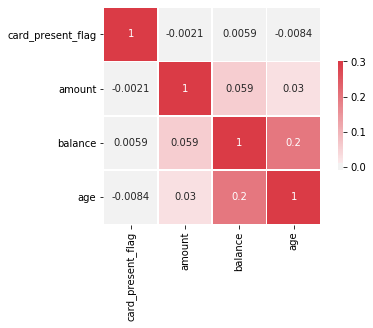

In [22]:
# Plotting the correlation heatmap 
cor_mat = df[['card_present_flag' , 'amount' , 'balance' ,'date' , 'status', 
             'bpay_biller_code' , 'account' , 'txn_description',
             'gender' , 'age' , 'extraction']].corr()
# Custom cmap pallete
cmap = sns.diverging_palette(220 , 10 , as_cmap=True)

# Building heatmap
sns.heatmap(cor_mat ,vmax=.3 ,annot=True, center=0 , cmap=cmap , square=True , linewidths=.5 , cbar_kws={'shrink': .5})

In [23]:
# Correlation matrix in Tabular form
cor_mat

,card_present_flag,amount,balance,age
card_present_flag,1.000000,-0.002074,0.005925,-0.008405
amount,-0.002074,1.000000,0.059178,0.029980
balance,0.005925,0.059178,1.000000,0.199329
age,-0.008405,0.029980,0.199329,1.000000


Things we can infer from the heatmap : 


**Considerable Correlation**
* The amount and balance have a pretty good correlation together
* The amount and age have a decent correlation which we can consider.
* The balance and age have a strong correlation.

**Non-Considerable Correlation**
* The age and card_present_flag has negative correlation.
* The amount and car-present_flag has negative correlation.


### Filtering things out of Months for better analyzing the data

>**Goal**
* Average amount transacted in each month.
* Maximum amount transacted in each month.
* Minimum amount transacted in each month.

#### Analyzing October Month stats 

In [24]:
# Checking amount transacted in October month
filt = (df['month_name'] == 'October')
df.loc[filt , 'amount']

7956      29.57
7957       8.44
7958     163.00
7959      10.65
7960      33.00
          ...  
12038      9.79
12039     63.87
12040     43.96
12041     30.77
12042     22.36
Name: amount, Length: 4087, dtype: float64

In [25]:
# Average amount in october month
df.loc[filt , 'amount'].mean()

196.42732321996542

In [26]:
# Maximum Value transacted in October month 
df.loc[filt , 'amount'].max()

8835.98

In [27]:
# Minimum Value transacted in October month 
df.loc[filt , 'amount'].min()

0.1

>In October Month : 
* The average amount transacted was `196.42732321996542`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `0.1`

#### Analyzing September month stats

In [28]:
# Checking amount transacted in September month
filt = (df['month_name'] == 'September')
df.loc[filt , 'amount']

3943     9.15
3944    85.84
3945    15.66
3946    14.87
3947    26.00
        ...  
7951    17.36
7952    21.62
7953     8.33
7954    20.12
7955    19.71
Name: amount, Length: 4013, dtype: float64

In [29]:
# Average amount in september month
df.loc[filt , 'amount'].mean()

182.04590331422853

In [30]:
# Maximum amount in september month
df.loc[filt , 'amount'].max()

8835.98

In [31]:
# Minimum Value transacted in september month 
df.loc[filt , 'amount'].min()

0.1

>In September Month : 
* The average amount transacted was `182.04590331422853`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `0.1`

#### Analyzing August month stats

In [32]:
# Checking amount transacted in August month
filt = (df['month_name'] == 'August')
df.loc[filt , 'amount']

0       16.25
1       14.19
2        6.42
3       40.90
4        3.25
        ...  
3938    21.86
3939    43.57
3940    14.46
3941    11.06
3942     7.59
Name: amount, Length: 3943, dtype: float64

In [33]:
# Average amount in august month
df.loc[filt , 'amount'].mean()

185.12186659903654

In [34]:
# Maximum amount in september month
df.loc[filt , 'amount'].max()

8835.98

In [35]:
# Minimum amount in september month
df.loc[filt , 'amount'].min()

1.52

>In August Month : 
* The average amount transacted was `185.12186659903654`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `1.52`

#### Visualizing Number of Male and Female Customer's 

M    6285
F    5758
Name: gender, dtype: int64


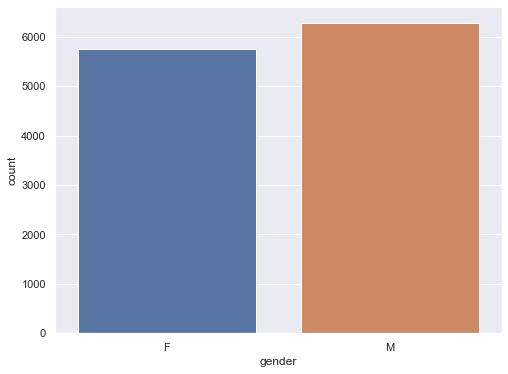

In [36]:
print(df['gender'].value_counts())
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(df['gender'])
plt.show()

>There are more Male customers than Female customers

#### Months where the highest number of transaction took place

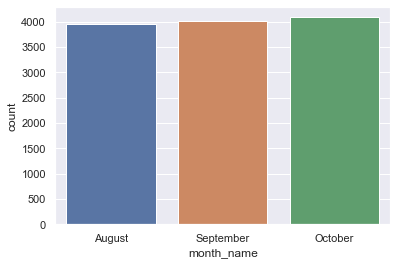

In [37]:
sns.countplot(x='month_name' , data=df)

>* October is the month where 4087 transaction took place by all those customers which was highest comparing rest of the months.
>* August has low transaction comparing other months of 3943.

#### Month where highest number of transaction took place based on gender

Text(0.5, 1.0, 'Month where highest number of\ntransaction took place based on gender')

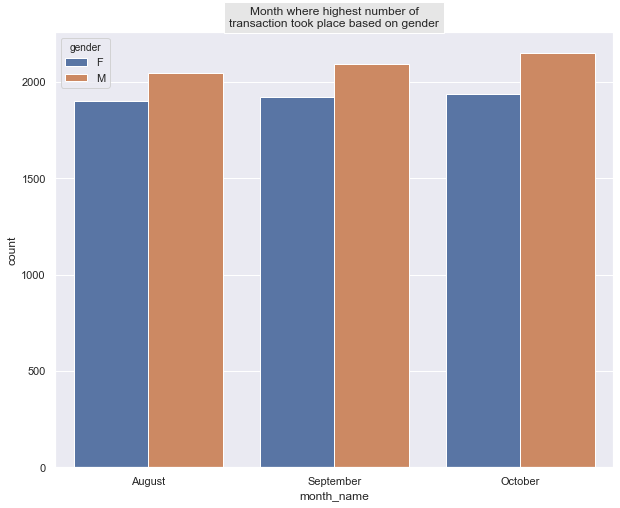

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='month_name' ,hue='gender', data=df)
plt.title('Month where highest number of\n'+'transaction took place based on gender',bbox={'facecolor':'0.9', 'pad':5})

>We can clearly infer Male has made more transaction than Female on all three months

#### Day's where more number of transaction took place

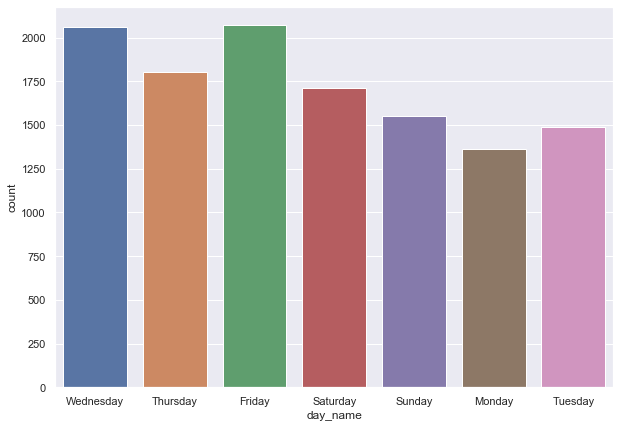

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x='day_name' , data=df)

> Wednesday and Friday were the day's where more number of transaction took place

#### Day's where most number transaction took place base on gender distribution

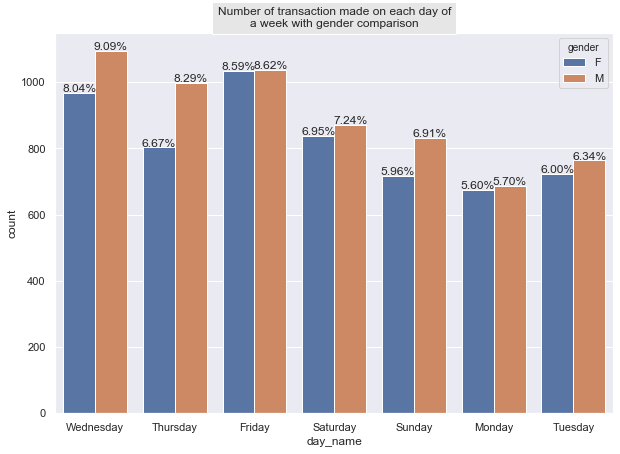

In [40]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="day_name", hue="gender", data=df) # for Seaborn version 0.7 and more
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 

plt.title('Number of transaction made on each day of\n'+'a week with gender comparison',bbox={'facecolor':'0.9', 'pad':5})
plt.show()

>Male has made more transaction in all days than Female

### Number of transaction  had card during the transaction (physical card)

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64


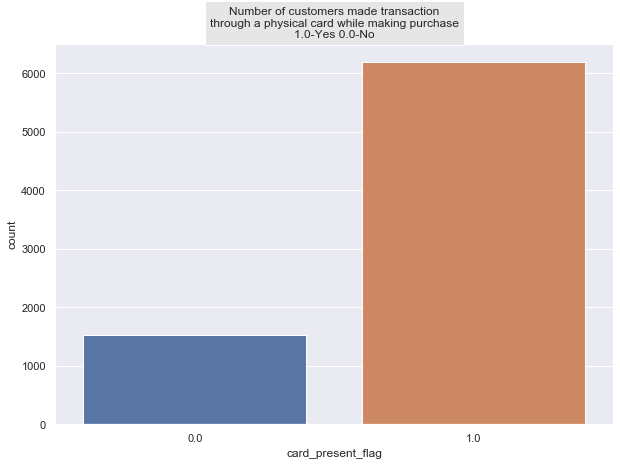

In [41]:
plt.figure(figsize=(10,7))
print(df['card_present_flag'].value_counts())
ax = sns.countplot(x='card_present_flag' , data=df)
total = float(len(df['card_present_flag']))
plt.title('Number of customers made transaction\n'+'through a physical card while making purchase\n'+'1.0-Yes 0.0-No',bbox={'facecolor':'0.9', 'pad':5} )
plt.show()

> * 6194 transaction had made with an physical card
> * 1523 transaction made with no card (internet banking etc.)

### Number of transaction done on each state

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


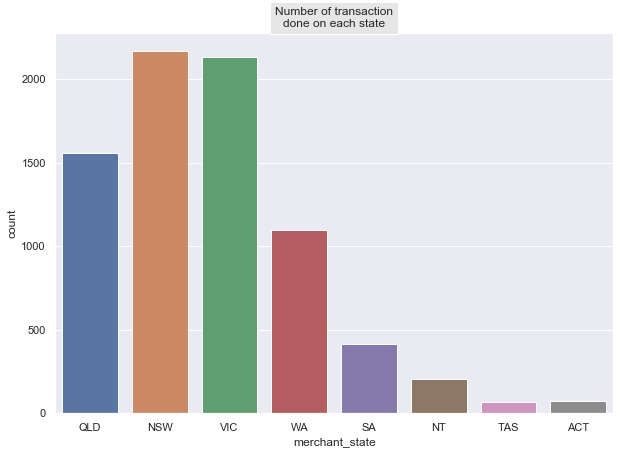

In [42]:
print(df['merchant_state'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['merchant_state'])
plt.title('Number of transaction\n' 'done on each state',bbox={'facecolor':'0.9', 'pad':5})
plt.show()


> Transaction in numbers:
* NSW  :  2169
* VIC  :  2131
* QLD  :  1556
* WA   :  1100
* SA    :  415
* NT     : 205
* ACT     : 73
* TAS      : 68

### Percentage of source by which transaction took place

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


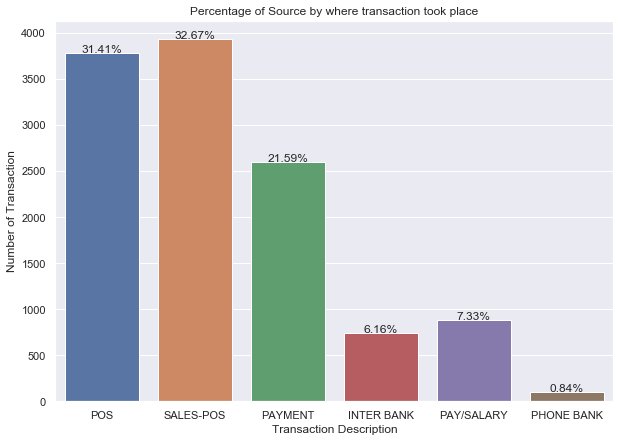

In [43]:
print(df['txn_description'].value_counts())
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
ax = sns.countplot(df['txn_description'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of Source by where transaction took place')
plt.ylabel('Number of Transaction')
plt.xlabel('Transaction Description')
plt.show()


> * approx **63%** More transaction was done through Point of Sale, for example shopping etc..
> * Phone banking is the lowest source of 0.84%
> * Pay/Salary means the salary credited.

#### Distribution of customer's based on age group

Text(0.5, 1.0, 'Distribution of customers based on age group')

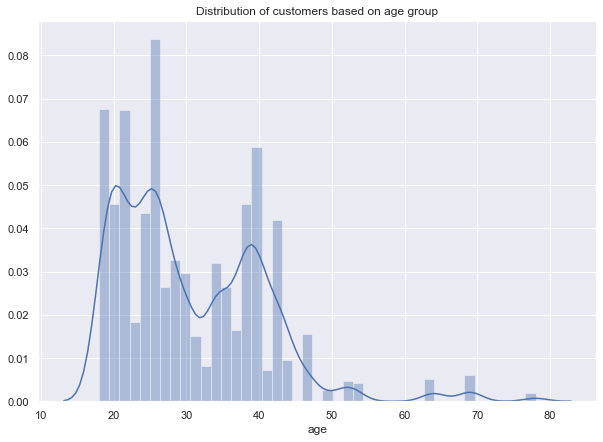

In [44]:
plt.figure(figsize=(10,7))
sns.distplot(df['age']);
plt.title('Distribution of customers based on age group' , )

#### Which age group of customers have more balance ? 

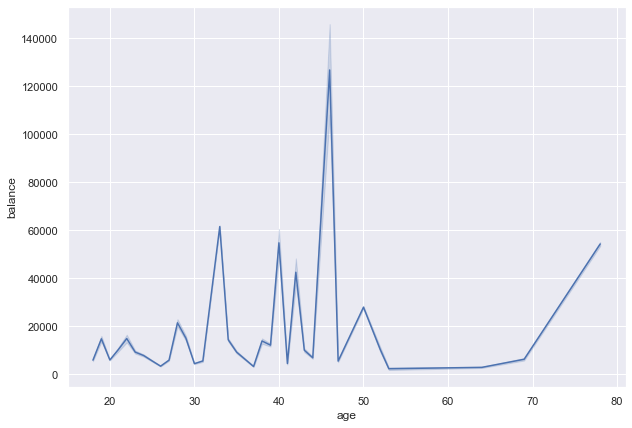

In [45]:
# Figuring out which age group has more balance.
plt.figure(figsize=(10,7))
sns.lineplot(x='age' , y='balance' , data=df)

> * The age group between **45 - 50** has an balance of approx **130000 AUD**
> * Age group between 18 - 25 has balance under 20000.
> * Age group between 55 - 70 has less than 20000 balance (AUD)

#### Amount transaction done with distribution of age groups

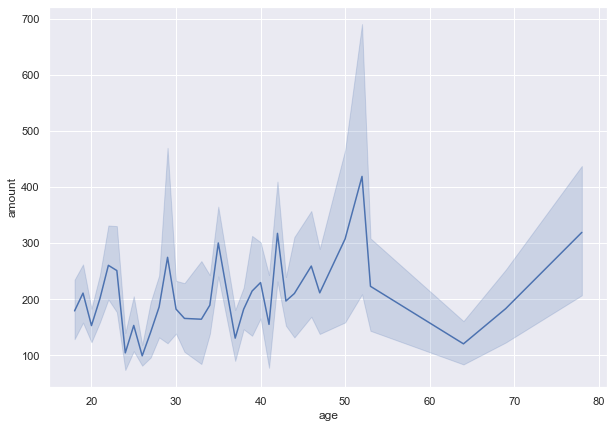

In [46]:
# Figuring out which age group has transacted more
plt.figure(figsize=(10,7))
sns.lineplot(x='age' , y='amount' , data=df)

> * Age group between **45 - 55** has transacted more amount above 400 AUD
> * Age group between **20-25** has transacted least amount approx 100 or above

#### Taking average for all the numerical  columns in the dataframe

In [47]:
# Checking the mean for numerical data in dataframe
df.mean()

card_present_flag        0.802644
merchant_code            0.000000
balance              14704.195553
age                     30.582330
amount                 187.933588
dtype: float64

>**In the 3 months of transaction data:**
* The average age group of customers who made the transactions are 30 years of age.
* The average balance a customer have in their account is 14704.195 AUD.
* The average transaction made by the customer is 187.93 AUD.

### Making Analysis by making columns into Groups

In [48]:
# making a group with merchant_state dataframe
mer_state_grp = df.groupby(['merchant_state'])

##### Number of Male and Female made transaction in the particular merchant state's

Text(0.5, 1.0, 'Number of Male and Female\nmade transaction in particular state')

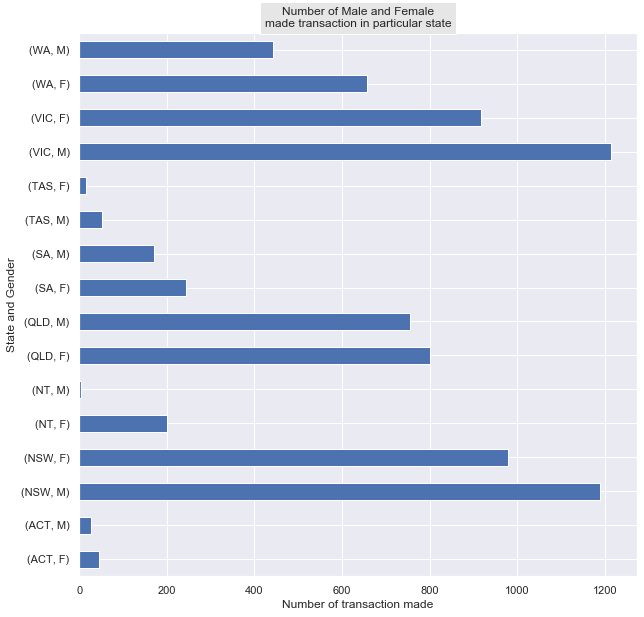

In [49]:
gen_mer_state = mer_state_grp['gender'].value_counts()
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
gen_mer_state.plot.barh()
ax.set(xlabel="Number of transaction made",
      ylabel="State and Gender")
plt.title('Number of Male and Female\n'+'made transaction in particular state',bbox={'facecolor':'0.9', 'pad':5})




#### Percentage for each state of Male and Female

In [50]:
print(mer_state_grp['gender'].value_counts(normalize=True))

merchant_state  gender
ACT             F         0.630137
                M         0.369863
NSW             M         0.548179
                F         0.451821
NT              F         0.975610
                M         0.024390
QLD             F         0.514139
                M         0.485861
SA              F         0.590361
                M         0.409639
TAS             M         0.764706
                F         0.235294
VIC             M         0.569216
                F         0.430784
WA              F         0.597273
                M         0.402727
Name: gender, dtype: float64


##  Breaking down analysis
### Below are made taking account of Top 5 states in Australia by population
* **At Tasmania `76.4%` Male made transaction and `23.5%` Female made transaction which shows Male contributed alot to Tasmania.**

* **At Western Australia Female have made `59.8%` of transaction and Male made `40.2%` of transaction which shows Female contribution is more in WA.**

* **At Queensland Female have made `51.14%` of transaction and Male made `48.96%` of transaction which shows Female contribution is more in QLD.**

* **At South Australia Female have made `59.03%` of transaction and Male made `40.96%` of transaction which shows Female contribution is more in SA.**

* **At New South Wales Male have made `54.82%` of transaction and Male made `45.18%` of transaction which shows Female contribution is more in NSW.**

* **At Victoria Male have made `56.92%` of transaction and Male made `43.08%` of transaction which shows Female contribution is more in Victoria**


####  Number of debit and credit transaction took place

debit     11160
credit      883
Name: movement, dtype: int64


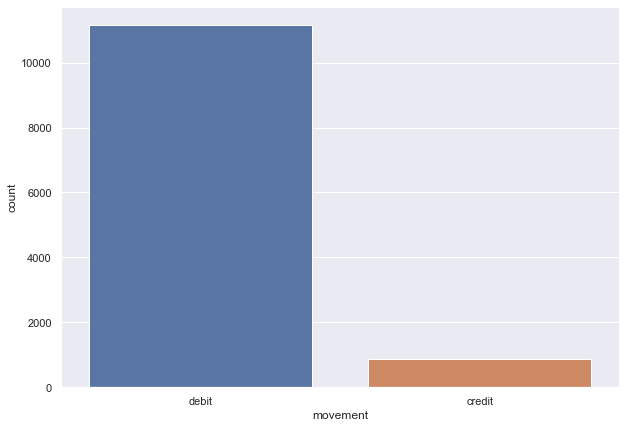

In [40]:
plt.figure(figsize=(10,7))
print(df['movement'].value_counts())
sns.countplot(df['movement'])

**We can infer that there were large number of Debit transaction made than Credit transaction**
* Debit Transaction `11160`
* Credit Transaction `883`


#### Which gender made most debit and credit transaction ?


Text(0.5, 1.0, 'Percentage of Male and Female who made\nDebit and Credit Transaction')

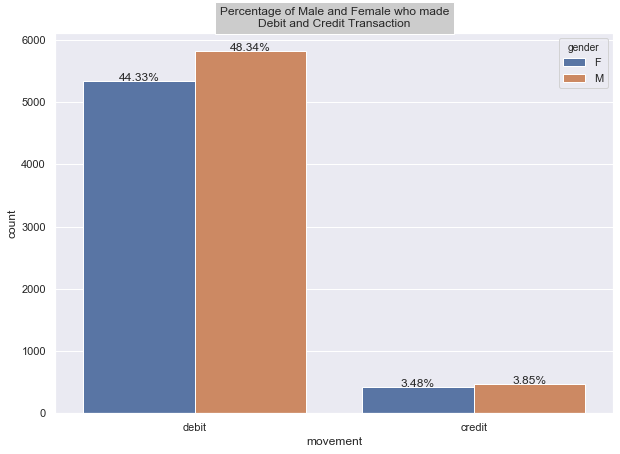

In [41]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['movement'] , hue=df['gender'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of Male and Female who made\n'+'Debit and Credit Transaction',bbox={'facecolor':'0.8', 'pad':5})

#### Percentage of Male and Female who made Debit and Credit Transaction :
* **Over `48.34%` Male and `44.33%` Female have made Debit Transaction.**
* **Over `3.85%` Male and `3.48%` Female have made Credit Transaction.**

**To sum up approx 92% people have done debited transaction and 8% done credited transaction**


### Percentage of contribution of months

Text(0.5, 1.0, 'Percentage of contribution\nof months')

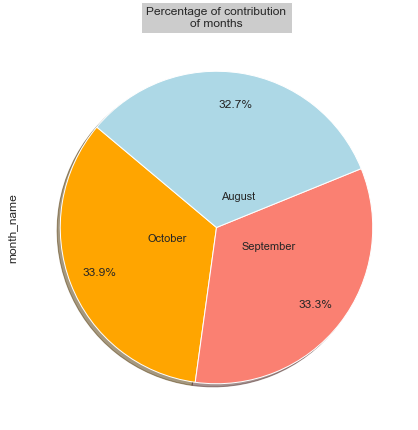

In [51]:
pie_color = ['orange' , 'salmon', 'lightblue']
fig,ax = plt.subplots(figsize=(7,8)) # (height,width)

df['month_name'].value_counts(sort=True).plot.pie(labeldistance=0.2 ,
                                         colors=pie_color,
                                        autopct='%1.1f%%', shadow=True, startangle=140,pctdistance=0.8 , radius=1)
plt.title("Percentage of contribution\n" + "of months", bbox={'facecolor':'0.8', 'pad':5})



### Percentage of contribution of gender 


Text(0.5, 1.0, 'Percentage of contribution\nof Male and Female')

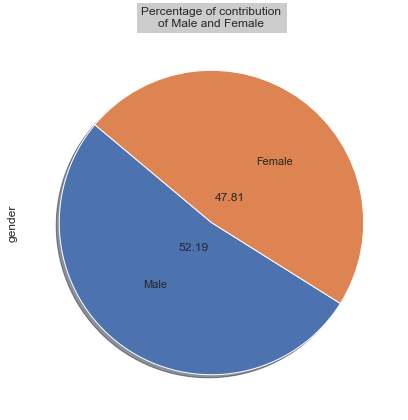

In [43]:
plt.figure(figsize=(10,7))
df['gender'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Male',
                                                                         'Female'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of contribution\n'+'of Male and Female' , bbox={'facecolor':'0.8', 'pad':5})


### Top 10 Customers who made transaction 

In [44]:
# Top 10 customers 
top_cust = df['first_name'].value_counts(sort=True).nlargest(10)
top_cust

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

**Michael has made more transaction of 746**

#### Visualizing the Top 10 Customer

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Top 10 Customer')]

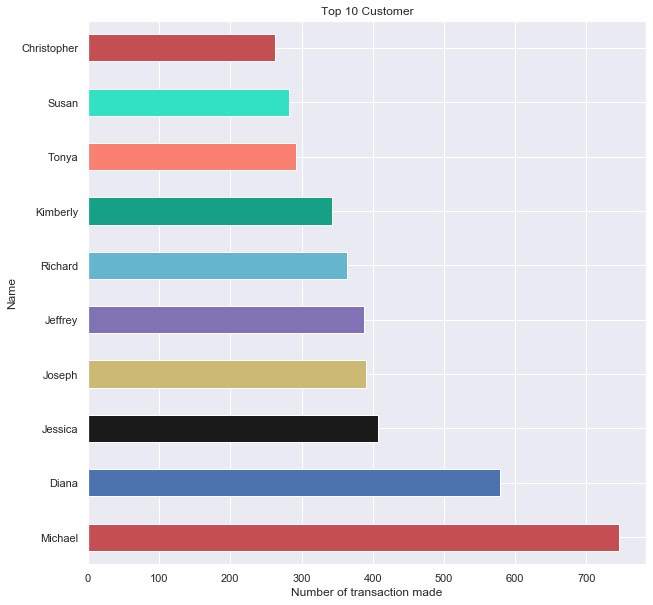

In [79]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
top_cust.plot.barh(color=my_colors)
ax.set(title="Top 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")


### Least 10 Customers who made transaction

In [53]:
tail_cust = df['first_name'].value_counts(sort=True).nsmallest(10)
tail_cust

#Colors for the bar's of the graph
my_colors = ['r','b','k','y','m','c','#16A085','salmon' , '#32e0c4']

#### Visualizing Least 10 Customer's 

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Least 10 Customer')]

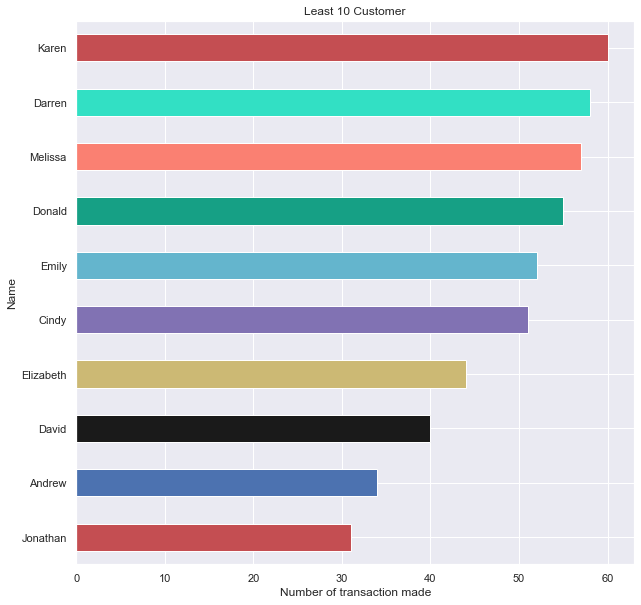

In [47]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
tail_cust.plot.barh(color=my_colors)
ax.set(title="Least 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")


**Jonathan has made fewer transaction of 31**

In [55]:
gender_grp = df.groupby(['gender'])

### Average transaction amount made by Male and Female

In [57]:
gen_trans_amt = gender_grp['amount'].mean()

#### Average transaction amount made by Male and Female

[Text(0, 0.5, 'Gender'),
 Text(0.5, 0, 'Average amount'),
 Text(0.5, 1.0, 'Average amount transacted by Male and Female')]

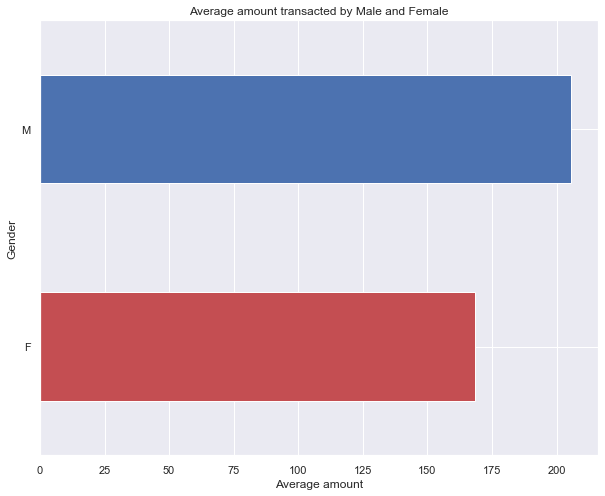

In [50]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
gen_trans_amt.plot.barh(color=my_colors)
ax.set(title="Average amount transacted by Male and Female",
      xlabel="Average amount",
      ylabel="Gender")


> On average, Male has transacted more amount than female

##  Maximum , Minimum and Average amount transacted in each merchant state

In [60]:
# Making a group of the merchant state
agg_amt_state = mer_state_grp['amount'].agg(['min' , 'mean' , 'max'])

In [61]:
agg_amt_state.columns

Index(['min', 'mean', 'max'], dtype='object')

In [62]:
agg_amt_state

,min,mean,max
merchant_state,,,
ACT,4.50,66.803836,1348.47
NSW,0.10,47.036316,4233.00
NT,1.71,44.726293,1285.09
QLD,0.10,34.372397,7081.09
SA,3.28,40.425470,909.61
TAS,7.35,28.866618,133.31
VIC,0.10,41.099953,3680.71
WA,2.05,30.901873,1692.56


### Minimum ammount transacted in each state

merchant_state
ACT    4.50
NSW    0.10
NT     1.71
QLD    0.10
SA     3.28
TAS    7.35
VIC    0.10
WA     2.05
Name: min, dtype: float64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Amount'),
 Text(0.5, 1.0, 'Minimum amount transacted in each state')]

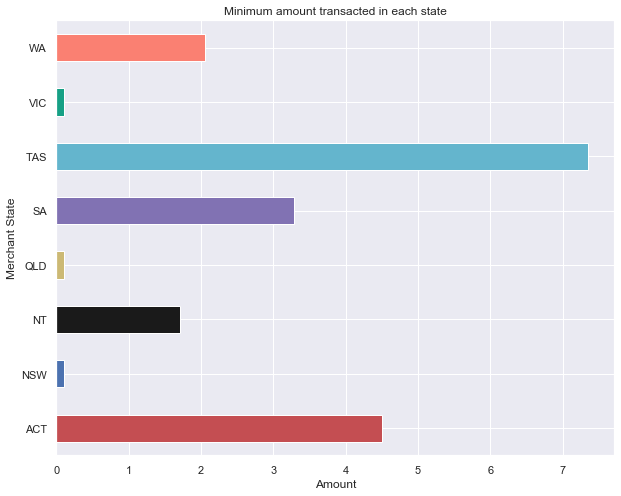

In [63]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
print(agg_amt_state['min'])
agg_amt_state['min'].plot.barh(color=my_colors)
ax.set(title="Minimum amount transacted in each state",
      xlabel="Amount",
      ylabel="Merchant State")

### Maximum amount transacted in each state


merchant_state
ACT    1348.47
NSW    4233.00
NT     1285.09
QLD    7081.09
SA      909.61
TAS     133.31
VIC    3680.71
WA     1692.56
Name: max, dtype: float64


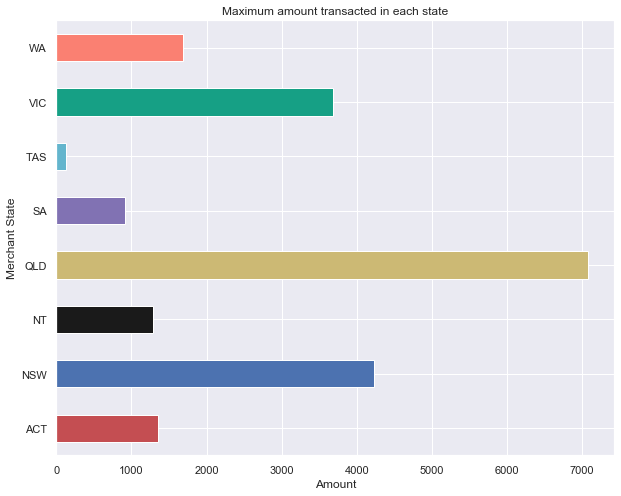

In [67]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
agg_amt_state['max'].plot.barh(color=my_colors)
ax.set(title="Maximum amount transacted in each state",
      xlabel="Amount",
      ylabel="Merchant State")
print(agg_amt_state['max'])

## Number of Transaction made on each state based on  Customer 

In [68]:
trans_desc_grp = df.groupby(['txn_description'])

In [69]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [58]:
trans_desc_grp['first_name'].value_counts().loc['SALES-POS'].nlargest(10)

first_name
Diana          272
Michael        262
Joseph         170
Jeffrey        166
Jessica        148
Kimberly       143
Tonya          123
Richard        112
Rhonda         109
Christopher     95
Name: first_name, dtype: int64

## Number of transaction made in each state by the Top 5 Customer's

In [59]:
# Printing out Top 5 Customer 
top_cust[:5]

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

In [60]:
# Top 5 customer's transaction
michael_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Michael').sum())
diana_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Diana').sum())
jess_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Jessica').sum())
jose_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Joseph').sum())
jeff_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Jeffrey').sum())

### Number of transaction made by Michael in each state. 

merchant_state
ACT      1
NSW    273
NT       0
QLD     25
SA      18
TAS      2
VIC    141
WA      59
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Michael in each state')]

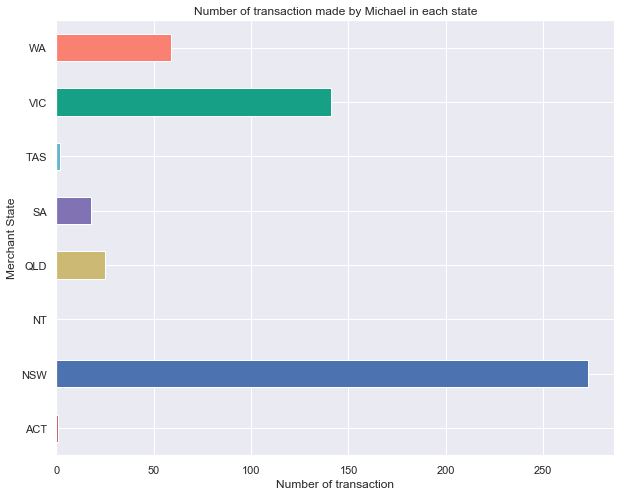

In [61]:
fig,ax = plt.subplots(figsize=(10,8))
print(michael_tran_each_state);
michael_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Michael in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Diana  in each state

merchant_state
ACT      0
NSW     63
NT       1
QLD    444
SA       1
TAS      0
VIC     17
WA       5
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Diana in each state')]

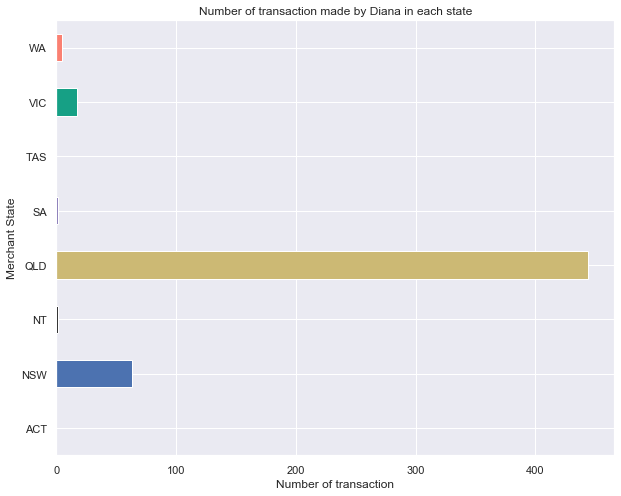

In [62]:
fig,ax = plt.subplots(figsize=(10,8))
print(diana_tran_each_state);
diana_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Diana in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Jessica in each state

merchant_state
ACT     23
NSW     45
NT     110
QLD      7
SA      59
TAS      0
VIC     11
WA      31
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Jessica in each state')]

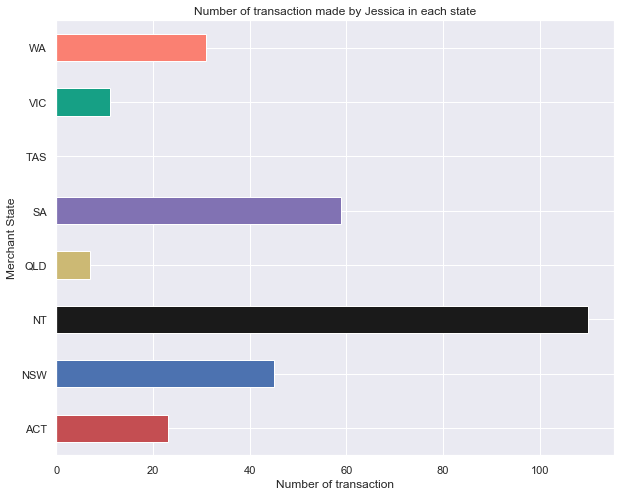

In [63]:
fig,ax = plt.subplots(figsize=(10,8))
print(jess_tran_each_state);
jess_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Jessica in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Joseph in each state 

merchant_state
ACT      0
NSW     26
NT       0
QLD    165
SA       1
TAS      5
VIC    104
WA       5
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Joseph in each state')]

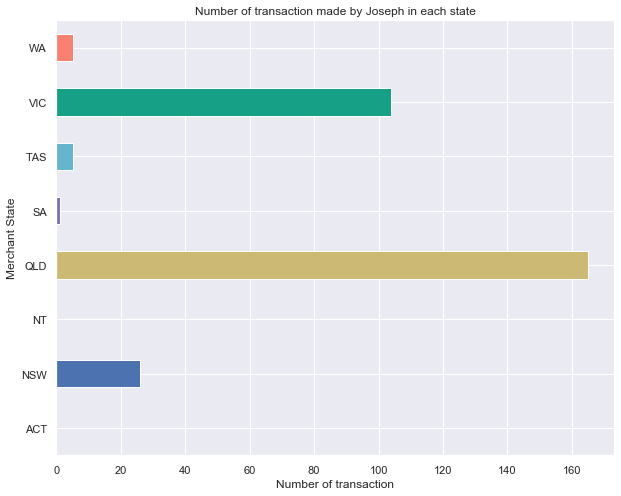

In [64]:
fig,ax = plt.subplots(figsize=(10,8))
print(jose_tran_each_state);
jose_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Joseph in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Jeffrey in each state 

merchant_state
ACT      1
NSW     26
NT       0
QLD    175
SA       7
TAS      0
VIC    103
WA       4
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Jeffrey in each state')]

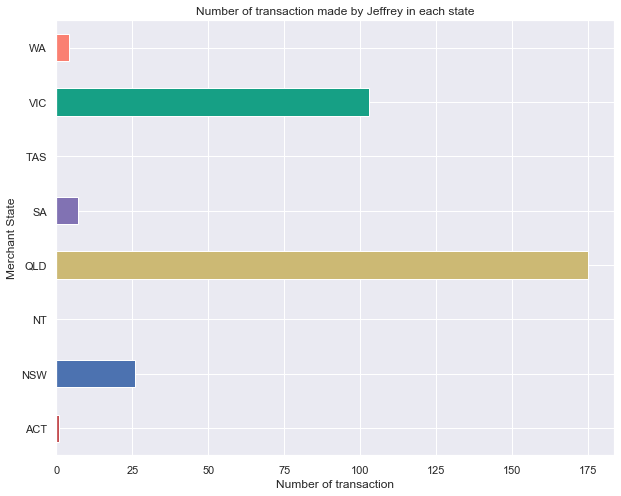

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
print(jeff_tran_each_state);
jeff_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Jeffrey in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

##  How many transactions do customers make each month, on average?

In [66]:
month_grp = df.groupby(['month_name'])

In [67]:
avg_amt_tran_month = month_grp['amount'].mean()
oct_amt_tran_month = month_grp['amount'].value_counts().loc['October']

month_name
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


[Text(0, 0.5, 'Month Name '),
 Text(0.5, 0, 'Average amount'),
 Text(0.5, 1.0, 'Average transaction made my customer on average each month')]

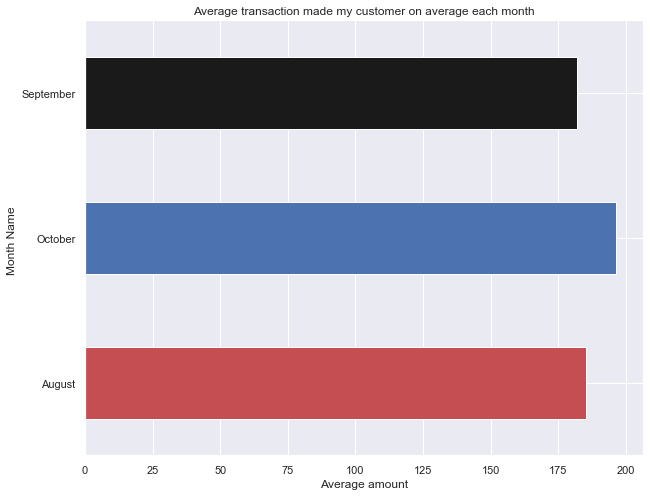

In [68]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
print(avg_amt_tran_month);
avg_amt_tran_month.plot.barh(color=my_colors)
ax.set(
    title='Average transaction made my customer on average each month',
    xlabel='Average amount',
    ylabel='Month Name '
)

In [69]:
oct_amt_tran_month = month_grp['amount'].value_counts().loc['October']
oct_amt_tran_month

amount
33.00      58
39.00      43
29.00      42
36.00      39
20.00      35
           ..
4094.33     1
4863.62     1
4910.90     1
6107.23     1
7081.09     1
Name: amount, Length: 2288, dtype: int64

In [70]:
oct_date = month_grp['date'].value_counts().loc['October']

## Average amount transacted on particualr Days

In [71]:
day_name_grp = df.groupby(['day_name'])

### On Monday 

In [72]:
day_name_grp['amount'].mean().loc['Monday']

373.22099999999995

### On Tuesday

In [73]:
day_name_grp['amount'].mean().loc['Tuesday']

221.5764559515801

### On Wednesday 

In [74]:
day_name_grp['amount'].mean().loc['Wednesday']

195.21556955889483

### On Thursday 

In [75]:
day_name_grp['amount'].mean().loc['Thursday']

184.01042198778472

### On Friday

In [76]:
day_name_grp['amount'].mean().loc['Friday']

249.35351664254722

### On Satuday 

In [77]:
day_name_grp['amount'].mean().loc['Saturday']

54.419286132241076

### On Sunday

In [78]:
day_name_grp['amount'].mean().loc['Sunday']

53.01584516129036

# 5. Modelling 

The goal is to predict the annual salary of the customer's. We can do this if customer transaction history has `PAY/SALARY` in it because it denotes the salary or payment credited to their account. Here we will build the model with only the data which has transaction description **PAY/SALARY**

#### Calculating mean for the annual salary

In [108]:
df_salaries = df[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [110]:
# Mean of the numerical columns for the PAY/SALARY 
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47,970
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65,3578
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51,1916
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39,1711
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73,3903


In [111]:
# Creating annual salary column 
salaries = []

for customer_id in df['customer_id']:
    salaries.append(int(df_salaries.loc[customer_id]['amount'].mean()))
df['annual_salary'] = salaries

In [112]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1013
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1013
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1002
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,892
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1013


In [113]:
df_salary = df[df['txn_description'] == 'PAY/SALARY']

In [114]:
df_salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,3903
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,1626
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,983
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,1408
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,1068


In [115]:
# Checking the columns 
df_salary.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'annual_salary'],
      dtype='object')

### Dropping columns 

The reason behind dropping columns is to neglect unwanted rows for modelling. We want to buil our model on features which has correlation below the correlation has been done. By plotting heatmap of the correlation matrix we can get a clear picture of feature selection for building our model

In [116]:
df_corr = df_salary.corr()
df_corr

,card_present_flag,merchant_code,balance,age,amount,annual_salary
card_present_flag,NaN,NaN,NaN,NaN,NaN,NaN
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,1.000000,0.194956,0.287501,0.287501
age,NaN,NaN,0.194956,1.000000,-0.138594,-0.138538
amount,NaN,NaN,0.287501,-0.138594,1.000000,1.000000
annual_salary,NaN,NaN,0.287501,-0.138538,1.000000,1.000000


In [117]:
# Columns to be dropped 
drop_1= ['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'merchant_id',
       'merchant_code', 'extraction' , 
        'transaction_id', 'country', 'customer_id', 
        'merchant_long_lat'  ,'merchant_suburb' , 'merchant_state',
        'txn_description' , 'first_name' , 
         'date']

In [119]:
df_salary.drop(drop_1 , axis=1 , inplace=True)

/Users/ashik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [120]:
df_salary

,balance,gender,age,amount,movement,annual_salary
50,8342.11,M,23,3903.95,credit,3903
61,2040.58,F,23,1626.48,credit,1626
64,3158.51,M,22,983.36,credit,983
68,2517.66,M,24,1408.08,credit,1408
70,2271.79,F,43,1068.04,credit,1068
...,...,...,...,...,...,...
11995,9378.51,M,26,1098.91,credit,1098
12000,3440.01,F,30,1158.15,credit,1158
12001,11381.44,M,69,1043.12,credit,1043
12003,11454.52,F,20,1395.49,credit,1395


In [121]:
# Checking the info of the df whether any missing values are there or not 
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   balance        883 non-null    float64
 1   gender         883 non-null    object 
 2   age            883 non-null    int64  
 3   amount         883 non-null    float64
 4   movement       883 non-null    object 
 5   annual_salary  883 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 48.3+ KB


#### Plotting a correlation map to get an idea for building our model

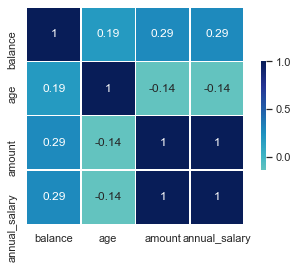

In [123]:
# Correlation matrix 
df_sal_cor = df_salary.corr()

# Building heatmap
sns.heatmap(df_sal_cor  , center=0 , cmap='YlGnBu' , square=True , linewidths=.5 ,annot=True, cbar_kws={'shrink': .5})

#### Splitting data into X and y 

In [124]:
# Splitting data into X and y 
X = df_salary.drop('annual_salary' , axis=1)
y = df_salary['annual_salary']

# Checking shape
X.shape , y.shape

((883, 5), (883,))

### Converting categorical into numbers

Since two columns are of object (string) we have to convert them into numbers in order to fit into the model for training. Machine Learning models cannot identify categorical variables it throws an error.

In [125]:
# Converting categorical into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['gender' , 'movement']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

X = transformer.fit_transform(X)
X

array([[0.000000e+00, 1.000000e+00, 1.000000e+00, 8.342110e+03,
        2.300000e+01, 3.903950e+03],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, 2.040580e+03,
        2.300000e+01, 1.626480e+03],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, 3.158510e+03,
        2.200000e+01, 9.833600e+02],
       ...,
       [0.000000e+00, 1.000000e+00, 1.000000e+00, 1.138144e+04,
        6.900000e+01, 1.043120e+03],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, 1.145452e+04,
        2.000000e+01, 1.395490e+03],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, 1.989345e+04,
        1.900000e+01, 2.639760e+03]])

#### Splitting into train and test split 
It is essential to split into train and test split for building our model, so our model will be more generalize and can make predictions on data which it hasnt seen before.

In [127]:
# Importing package
from sklearn.model_selection import train_test_split

# Split into train and test split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

## Building Base line Model

### Decision Tree 

In [128]:
# Importing the library
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

# Instantiate the model
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train , y_train)

# Score of the model
model_reg.score(X_test , y_test)

# Make predictions 
y_preds = model_reg.predict(X_test)

In [129]:
# Checking the score 
model_reg.score(X_test , y_test)

0.9997822494449063

### Linear Regression 

In [131]:
# Importing library 
from sklearn.linear_model import LinearRegression

# Setting up random seed
np.random.seed(42)

# Instantiate the model
model_lin = LinearRegression()

# Fit the model
model_lin.fit(X_train , y_train)

# Making predictions
y_lin_preds = model_lin.predict(X_test)

# Model Score 
model_lin.score(X_test , y_test)

0.9999999457011108

## Evaluation metrics on both models

### For Decision Tree

In [178]:
# Importing the libraries
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

# r2 score evalutation on decision tree
r2_dec = r2_score(y_test , y_preds) 

In [167]:
# Mean absoulte error on decision tree

mae_dec = mean_absolute_error(y_test , y_preds)
mae_dec

2.3433962264150945

In [168]:
# Mean Squared Error on decision tree 

mse_dec = mean_squared_error(y_test , y_preds)
mse_dec

309.3622641509434

### For Linear Regression 

In [179]:
# R2 score evaluation on linear reg 
r2_lin = r2_score(y_test , y_lin_preds)

In [170]:
#  Mean absoulte error on linear regression 

mae_lin = mean_absolute_error(y_test , y_lin_preds)
mae_lin

0.23571989810947094

In [171]:
# Mean Squared error on linear 

mse_lin = mean_squared_error(y_test , y_lin_preds)
mse_lin

0.0771434421209251

## Hyperparameter tuning using RandomSearch CV 

### For Decision Tree 

In [132]:
model_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [138]:
# Creating grid for Decision tree
dec_reg_grid = {'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2) , 
           'min_samples_split':np.arange(1,10,1),
            'max_leaf_nodes':np.arange(2,20,2) }

### Tuning our model with RandomizedSearchCV 

In [140]:
# Tune Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

np.random.seed(42)

# Setup random hyperparameter search for Decision Tree Regressor
rs_dec_reg = RandomizedSearchCV(DecisionTreeRegressor(),
                               param_distributions=dec_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_dec_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ashik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/ashik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/ashik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [141]:
# Best parameters 
rs_dec_reg.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 12,
 'max_depth': None}

In [236]:
# Evaluate RandomizedSearchCV model and predict
rs_y_preds = rs_dec_reg.predict(X_test)

# Evaluate the metrics 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

R2 Score:97.333085%
Mean Squared Error:37889.353727
Mean Absolute Error:100.792182


In [237]:
# Evaluating the model 
model_reg.score(X_test , y_test)

0.9997822494449063

## For Linear Regression 
For standard linear regression i.e OLS, there is none. The number/ choice of features is not a hyperparameter, but can be viewed as a post processing or iterative tuning process.

#### Using Cross Validation for Evaluation 

In [162]:
# Importing the packages 
from sklearn.model_selection import cross_val_score

# Setting up the seed 
np.random.seed(42)

# Setting the score parameter to None which means default metrics
cv_def = cross_val_score(model_lin, X , y , cv=5 , scoring=None)

### Evaluating our cross validated model

In [173]:
# Scoring parameter to r2 
np.random.seed(42)
cv_r2 = cross_val_score(model_lin , X , y , scoring='r2')
cv_r2 = np.mean(cv_r2)

In [174]:
# Scoring parameter to mean absolute error 
np.random.seed(42)
cv_mae = cross_val_score(model_lin , X , y , scoring='neg_mean_absolute_error')
cv_mae = np.mean(cv_mae)

In [175]:
# Scoring parameter to mean squared error 
np.random.seed(42)
cv_mse = cross_val_score(model_lin , X , y , scoring='neg_mean_squared_error')
cv_mse = np.mean(cv_mse)

## Visualizing evaluation metrics 

### For Decision Tree 

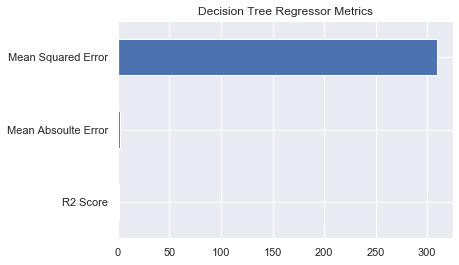

In [217]:
# Visualize decision tree regressor metrics

decision_tree_metrics = pd.DataFrame({'R2 Score':r2_dec,
                           'Mean Absoulte Error':mae_dec,
                           'Mean Squared Error':mse_dec },
                         index=[0])

decision_tree_metrics.T.plot.barh(title = 'Decision Tree Regressor Metrics', 
                     legend= False)

### For Linear Regression

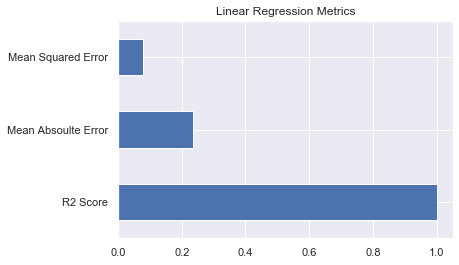

In [216]:
# Visualize linear regression metrics

linear_metrics = pd.DataFrame({'R2 Score':r2_lin,
                           'Mean Absoulte Error':mae_lin,
                           'Mean Squared Error':mse_lin },
                         index=[0])

linear_metrics.T.plot.barh(title = 'Linear Regression Metrics', 
                     legend= False)

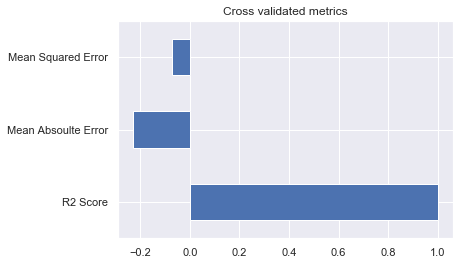

In [215]:
# Visualize cross-validated metrics 

cv_metrics = pd.DataFrame({'R2 Score':cv_r2,
                           'Mean Absoulte Error':cv_mae,
                           'Mean Squared Error':cv_mse },
                         index=[0])

cv_metrics.T.plot.barh(title = 'Cross validated metrics', 
                     legend= False)

In [189]:
model_lin.coef_

array([ 3.65439938e-02, -3.65439938e-02,  3.33066907e-16, -2.34416935e-07,
        6.22679032e-03,  9.99978171e-01])

## Feature Importance 

Feature importance is used to identify which feature contributed most to the outcome of the model. 

### For Decision tree 

In [193]:
dec_importance = model_reg.feature_importances_
dec_importance

array([1.19568266e-05, 1.02304570e-05, 0.00000000e+00, 1.95492700e-04,
       1.30356094e-02, 9.86746711e-01])

In [197]:
col_list =[]
for column in df_salary.columns:
     col_list.append(column)
print(col_list)

['balance', 'gender', 'age', 'amount', 'movement', 'annual_salary']


[Text(0, 0.5, 'Columns'),
 Text(0.5, 0, 'impotance'),
 Text(0.5, 1.0, 'Feature Importance for Decision Tree')]

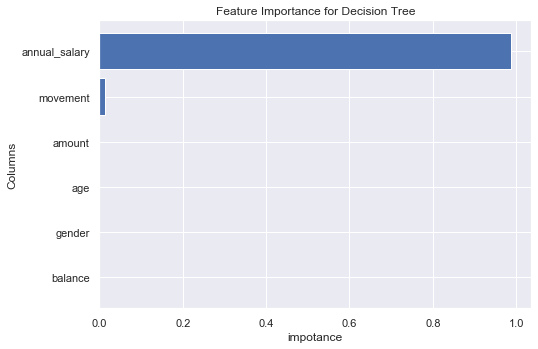

In [226]:
# Visualizing the feature importance for decision tree
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(col_list , dec_importance)
ax.set(title='Feature Importance for Decision Tree' ,
      xlabel = 'impotance' , ylabel='Columns')


### For Linear Regression 

In [202]:
linear_importance = model_lin.coef_
linear_importance

array([ 3.65439938e-02, -3.65439938e-02,  3.33066907e-16, -2.34416935e-07,
        6.22679032e-03,  9.99978171e-01])

[Text(0, 0.5, 'Columns'),
 Text(0.5, 0, 'importance'),
 Text(0.5, 1.0, 'Feature Importance for Linear Regression')]

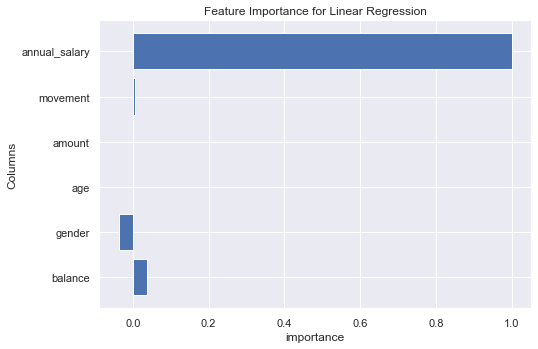

In [227]:
# Visualizing the feature importance for Linear Regression
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(col_list , linear_importance)
ax.set(title='Feature Importance for Linear Regression' , 
      xlabel='importance' , ylabel='Columns')


## Predicted Labels Vs Truth Labels

### For Linear Regression 

In [208]:
df_abs = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_lin_preds})
df_abs['Differences'] = df_abs['Predicted values'] - df_abs['Actual values']

In [209]:
df_abs

,Actual values,Predicted values,Differences
5337,1272,1272.137233,0.137233
8939,1843,1842.663830,-0.336170
5199,1059,1059.369167,0.369167
7301,1626,1625.988451,-0.011549
4645,2101,2101.122094,0.122094
...,...,...,...
2642,1013,1013.213018,0.213018
5773,3328,3328.163233,0.163233
8608,2179,2179.466995,0.466995
7634,2840,2839.657885,-0.342115


#### Visualizing with scatter plot how well our model is doing

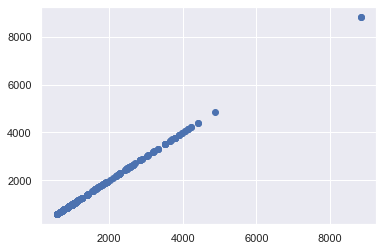

In [210]:
plt.scatter(y_test , y_lin_preds)

### For Decision Tree 

In [212]:
df_dec = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_preds})
df_dec['Differences'] = df_dec['Predicted values'] - df_dec['Actual values']

In [213]:
df_dec

,Actual values,Predicted values,Differences
5337,1272,1272.0,0.0
8939,1843,1843.0,0.0
5199,1059,1059.0,0.0
7301,1626,1626.0,0.0
4645,2101,2101.0,0.0
...,...,...,...
2642,1013,1013.0,0.0
5773,3328,3328.0,0.0
8608,2179,2179.0,0.0
7634,2840,2840.0,0.0


#### Visualizing with scatter plot how well our model is doing

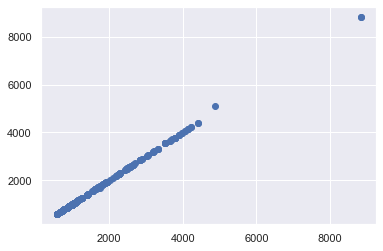

In [214]:
plt.scatter(y_test , y_preds)

In [232]:
def evaluate_preds(y_true , y_preds):
    '''
    
    Performs evaluation comparison on y_true labels Vs y_pred labels.
    on a regression model.
    '''
    r2score = r2_score(y_test , y_preds)
    mse = mean_squared_error(y_test , y_preds)
    mae= mean_absolute_error(y_test , y_preds)
    metric_dict = {'R2 Score': round(r2score,2),
                   'Mean Squared Error': round(mse,2),
                  'Mean Absolute Error':round(mae,2),
                  }
    print(f'R2 Score:{r2score*100:2f}%')
    print(f'Mean Squared Error:{mse:2f}')
    print(f'Mean Absolute Error:{mae:2f}')
    return metric_dict

## Compare metrics

In [245]:
# Below are the metrics for different evaluation done on model
baseline_metrics_linear = evaluate_preds(y_test , y_lin_preds)
baseline_metrics_tree = evaluate_preds(y_test , y_preds)
rs_metrics

compare_metrics = pd.DataFrame({
    'baseline linear regression':baseline_metrics_linear,
    'baseline decision tree':baseline_metrics_tree,})

R2 Score:99.999995%
Mean Squared Error:0.077143
Mean Absolute Error:0.235720
R2 Score:99.978225%
Mean Squared Error:309.362264
Mean Absolute Error:2.343396


### Visualizing the metrics of various model we built

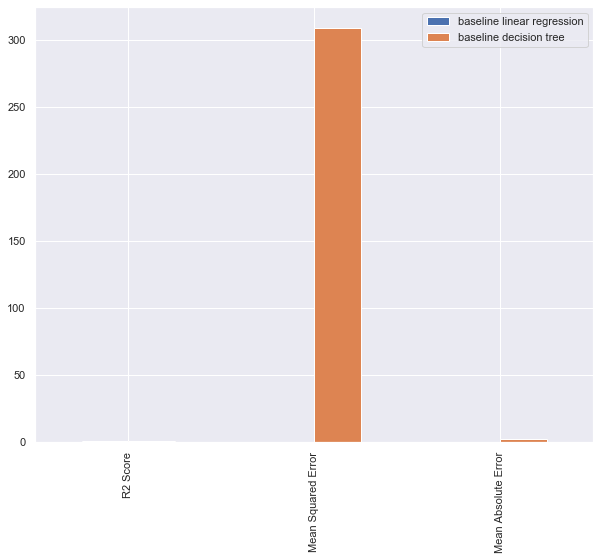

In [246]:
compare_metrics.plot.bar(figsize=(10,8))

**Some of the metrics didnt show up because of the distribution of the metrics some were below 1 thats why those metrics didnt show up**

## Saving the model

In [248]:
from joblib import dump,load

# Save model to file 
dump(model_lin , filename='Linear_model.joblib')
dump(model_reg , filename='Decision_Tree.joblib')

['Decision_Tree.joblib']

# 6. Experimentation

If there is some improvment we can do this model what are they would be : 

* Plot a Basemap with latitude and longitude data for better EDA analysis.
* Construct the models in Pipeline for being efficient.
* Day-based analysis should be done but not necessary for now.
* Use some of the regression models like Random Forest , Ridge etc to see how well our model does in those algorithims.